Ausführen von Zellen mit Shift-Enter und mit 'h' gibts eine Hilfe

In [1]:
import numpy as np
import pandas as pd

# Einführende Kommentare

## Eindimensionale Arrays

Numpy

In [2]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
a[1:3]

array([1, 2])

Pandas

In [4]:
s = pd.Series(np.random.random(3), index=['foo', 'bar', 'baz'])
s

foo    0.250630
bar    0.965435
baz    0.479477
dtype: float64

In [5]:
s["foo":"bar"]

foo    0.250630
bar    0.965435
dtype: float64

Hilfe gibts mit  `.<TAB>` oder load.sort_values() <- Cursor zwischen Klammer, `Shift-<TAB>`

## Zwei-Dimensionale Arrays

Numpy 

In [6]:
np.random.random((3,5))

array([[ 0.69321099,  0.85766825,  0.8164122 ,  0.65242608,  0.99375961],
       [ 0.46151745,  0.97807944,  0.14352409,  0.53120341,  0.98879877],
       [ 0.01848334,  0.03670167,  0.62907712,  0.99629039,  0.3166453 ]])

Pandas

In [7]:
s = pd.DataFrame(np.random.random((3,5)), index=['foo', 'bar', 'baz'])
s

0         1         2         3         4
foo  0.206091  0.131342  0.702106  0.925568  0.009406
bar  0.445378  0.211827  0.267552  0.601028  0.614746
baz  0.407768  0.929247  0.458935  0.455482  0.358732

In [8]:
s.mean()

0    0.353079
1    0.424139
2    0.476197
3    0.660692
4    0.327628
dtype: float64

# Daten einlesen

Wir schauen uns in diesem Beispiel nur Deutschland und die EU an, Großbritannien funktioniert genau so

In [9]:
de = pd.read_csv('tutorial_data/de_data.csv', parse_dates=True, index_col=0)
eu = pd.read_csv('tutorial_data/eu_data.csv', parse_dates=True, index_col=0)

In [10]:
wind = pd.read_csv('tutorial_data/wind.csv', parse_dates=True, index_col=0)

Die ersten 5 Zeilen/der "Kopf" der deutschen Daten:

In [11]:
de.head()

wind  solar     load
time                                         
2011-01-01 00:00:00  0.535144    0.0  46209.0
2011-01-01 01:00:00  0.580456    0.0  44236.0
2011-01-01 02:00:00  0.603605    0.0  42502.0
2011-01-01 03:00:00  0.614114    0.0  41479.0
2011-01-01 04:00:00  0.627257    0.0  39923.0

The wind, solar and load files are just differently organized datasets, its the same data

In [12]:
(wind['DE'] == de['wind']).all()

True

#  a) + b)

In [13]:
de.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name=u'time', length=35064, freq=None)

Zeiten gehen von 2011-01-01 bis 2014-12-31.

In [14]:
de.describe()

wind         solar          load
count  35064.000000  35064.000000  35064.000000
mean       0.265785      0.149262  54877.199806
std        0.239194      0.221564  10354.693128
min        0.000577      0.000000  29201.000000
25%        0.078827      0.000000  46321.750000
50%        0.181354      0.000000  54594.000000
75%        0.394514      0.268505  63953.250000
max        0.994588      0.913781  79286.000000

- 35064 Zeitpunkte: 8760h*4 + 24h (wegen 2012er Schaltjahr)
- Wind and Solar have a maximum slightly below 1, thus per-unit
- Load has a unit of MW, with the mean `<L> = 55 GW`, typical for Germany
- Max and Mean as shown in per-unit/MW
- Variance separately:

In [15]:
de.var()

wind     5.721393e-02
solar    4.909081e-02
load     1.072197e+08
dtype: float64

In [16]:
eu.describe()

wind         solar           load
count  35064.000000  35064.000000   35064.000000
mean       0.238825      0.156654  357003.275140
std        0.124324      0.210926   61235.523002
min        0.022194      0.000000  222327.000000
25%        0.141962      0.000000  309072.000000
50%        0.217789      0.012116  358094.500000
75%        0.316816      0.308416  397490.250000
max        0.719222      0.808031  539904.000000

- Same as for Germany, only that `<L> =  357 GW`

# c)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

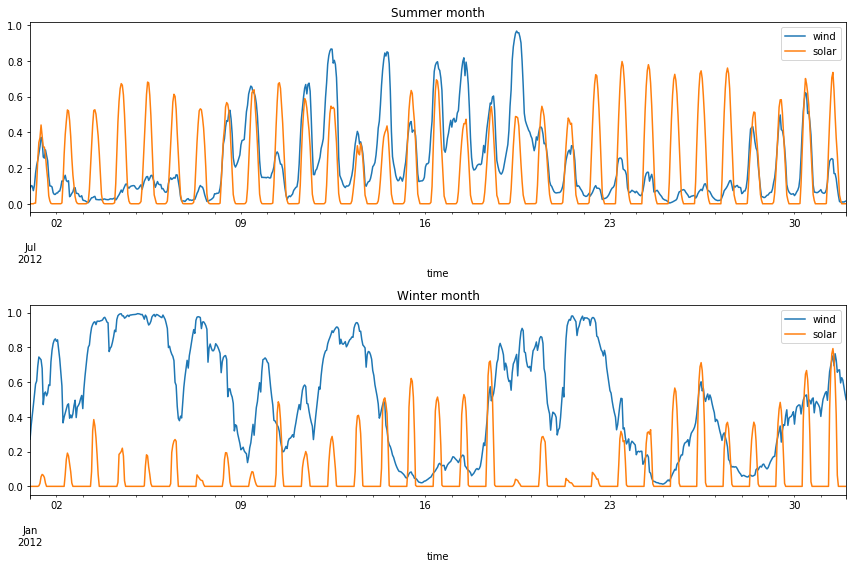

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
de.loc["2012-07", ['wind', 'solar']].plot(ax=axes[0])
axes[0].set_title("Summer month")

de.loc["2012-01", ['wind', 'solar']].plot(ax=axes[1])
axes[1].set_title("Winter month")

fig.tight_layout()

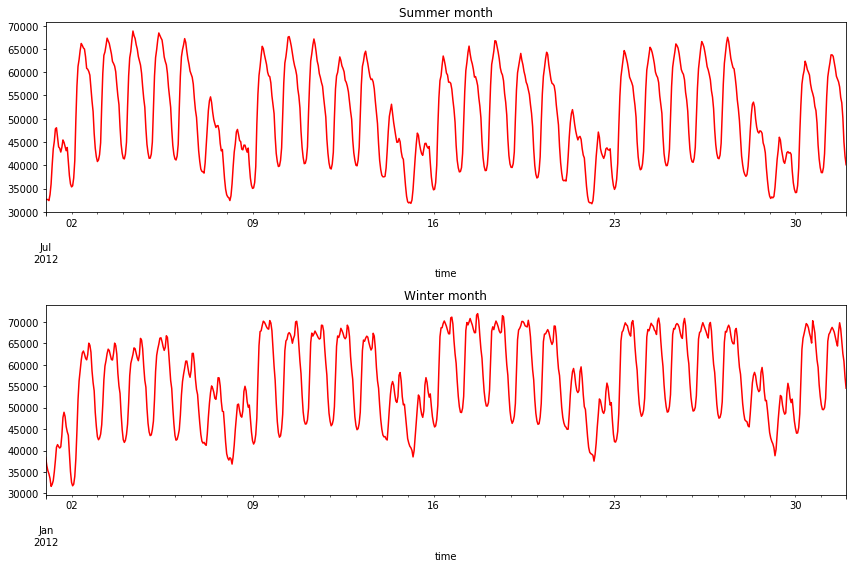

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
de.loc["2012-07", 'load'].plot(ax=axes[0], color='red')
axes[0].set_title("Summer month")

de.loc["2012-01", 'load'].plot(ax=axes[1], color='red')
axes[1].set_title("Winter month")

fig.tight_layout()

Let's also compare the wind between the different regions

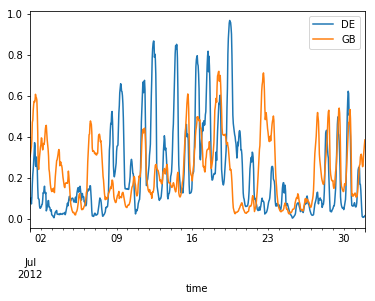

In [20]:
wind.loc["2012-7", ['DE', 'GB']].plot()

# d) Duration curve

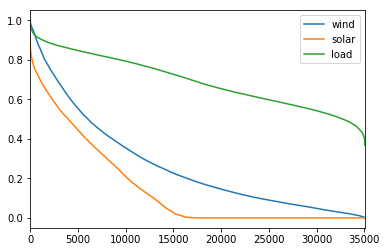

In [21]:
de['wind'].sort_values(ascending=False).reset_index(drop=True).plot()
de['solar'].sort_values(ascending=False).reset_index(drop=True).plot()
l = de['load']
l /= l.max() # Renormalize load to 1
l.sort_values(ascending=False).reset_index(drop=True).plot()

plt.legend()

# e) Probability density function

Es gibt zwei unterschiedlichen Methoden: [Histogramme](https://en.wikipedia.org/wiki/Histogram) und [Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation), das [zweite Bild](https://en.wikipedia.org/wiki/Kernel_density_estimation#/media/File:Comparison_of_1D_histogram_and_KDE.png) auf der KDE Seite ist eine gute Zusammenfassung. Beides bringt Pandas mit.


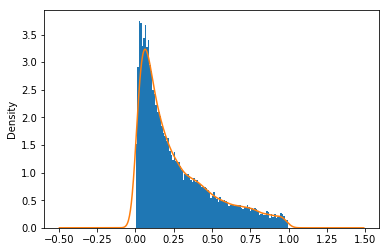

In [22]:
# 1)
de['wind'].plot.hist(bins=100, normed=True)

# 2)
de['wind'].plot.density()

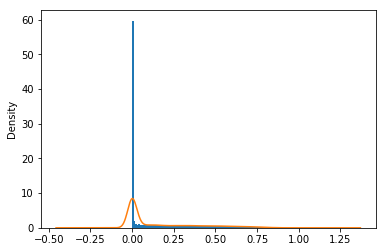

In [23]:
# 1)
de['solar'].plot.hist(bins=100, normed=True)

# 2)
de['solar'].plot.density()

(0.0, 2)

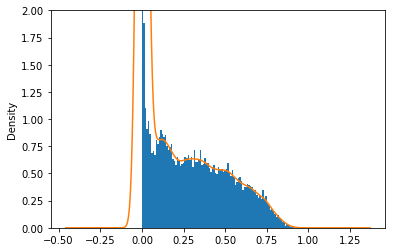

In [24]:
# Das gleiche wie oben als kleinerer Ausschnitt

# 1)
de['solar'].plot.hist(bins=100, normed=True)

# 2)
ax=de['solar'].plot.density()

ax.set_ylim(ymax=2)

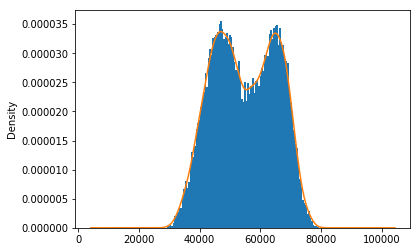

In [25]:
# 1)
de['load'].plot.hist(bins=100, normed=True)

# 2)
de['load'].plot.density()

# f) FFT

In [26]:
fft = abs(pd.Series(np.fft.rfft(de['load'] - de['load'].mean()),   # Mean rausnehmen
                    index=np.fft.rfftfreq(len(de), d=1./8760))**2)

Zum bestimmen der Frequenzen wird rfftfreq verwendet, das d gibt den Abstand zwischen zwei Datenpunkten an, `1h` Stunde, die wir als $\frac{1}{8760} a$ angeben, damit die Frequenzen in der Einheit $\frac{1}{a}$ rauskommen.

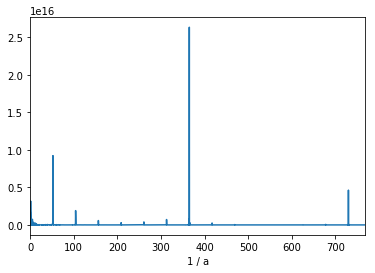

In [27]:
fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')

- Der größte Peak liegt bei 365 / a, i.e. einmal pro Tag
- Der zweitgrößte bei 52 / a, i.e. einmal pro Woche.

# g) Mismatch

Choose the country and alpha, gamma values and re-run

In [28]:
d = de
gamma = 1.0
alpha = 0.7

In [29]:
d = d / d.mean()
m = gamma * (alpha * d['wind'] + (1-alpha) * d['solar']) - d['load']

## Winter/Summer months

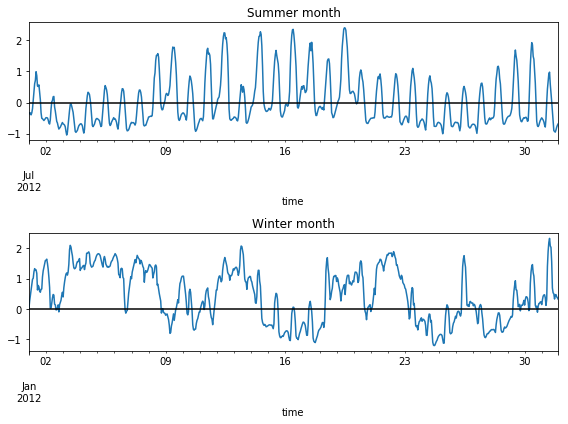

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

m.loc["2012-07"].plot(ax=axes[0])
axes[0].set_title("Summer month")

m.loc["2012-01"].plot(ax=axes[1])
axes[1].set_title("Winter month")

for ax in axes:
    ax.axhline(0., color='k')

fig.tight_layout()

## Duration curve

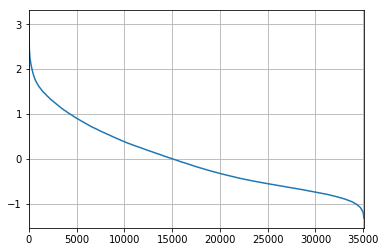

In [31]:
m.sort_values(ascending=False).reset_index(drop=True).plot().grid()

## Probability density function

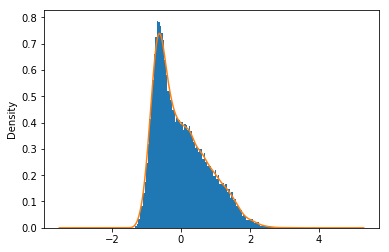

In [32]:
# 1)
m.plot.hist(bins=100, normed=True)

# 2)
m.plot.density()

## FFT

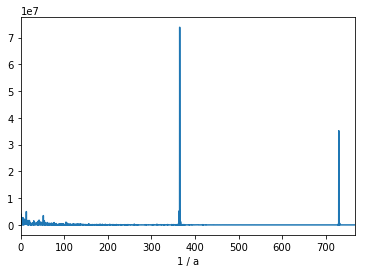

In [33]:
fft = abs(pd.Series(np.fft.rfft(m - m.mean()),   # Mean rausnehmen
                    index=np.fft.rfftfreq(len(m), d=1./8760))**2)

fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')